# Worldwide Trends in  CCUS Deployment and Adoption (So far)

by ***Clifford Okwudili Aniakor*** on 23rd September 2023

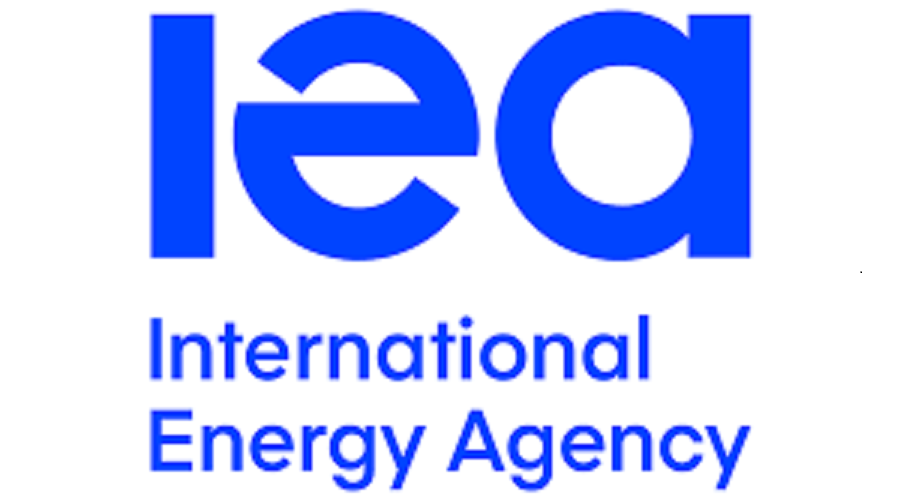

## Introduction

The dataset sourced from the IEA encapsulates CCUS projects and progression from around the world. The columns are self-explanatory. In this project, patterns and trends are revealed and accompanied by visualizations. The dataset required minimal to zero cleaning and questions were answered under the following statements:
- CCUS Deployment by Country
- Probable Fate of Captured CO2
- Number of Announced CCUS Projects Per Year
- Disaggregation of CCUS Projects by Sector and Project Type
- Progression of Average CCUS Capacity Over the Years
- CCUS Partner Companies by Participation

-

In [ ]:
#Install and update packages
! pip install --upgrade xlrd

In [ ]:
#import packages
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [ ]:
carbon=pd.read_excel("IEA CCUS Projects Database 2023.xlsx",sheet_name=3)

In [ ]:
#maximize row and column width
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
carbon

Project name  \
0    3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...   
1                               8Rivers H2 (8RH2) (WY)   
2     Abu Dhabi CCS Phase 1: Emirates Steel Industries   
3     Abu Dhabi CCS Phase 2: Habshan and Bab gas plant   
4                Abu Dhabi CCS Phase 2: Shah gas plant   
5               Acorn CCS phase 1-Capture at St Fergus   
6                                Acorn CCS phase 1-T&S   
7                                    Acorn CCS phase 2   
8                                             Acorn H2   
9                   Adbri Calix new Lime plant Kwinana   
10           ADM & Wolf Carbon Solutions pipeline (IA)   
11                    ADM Cedar rapids bioethanol (IA)   
12                         ADM Clinton bioethanol (IA)   
13   Advanced CO2 Capture from Hydrogen Production ...   
14                     Aemetis CCS Keyes facility (CA)   
15                 Aemetis CCS Riverbank facility (CA)   
16               Air Liquide Botlek Rotterdam refinery   
17   Air Liquide Total Energies Grandpuits biorefinery   
18   AirCapture DACU at Nutrien Kennewick Fertilize...   
19    AirCapture Nuclear DAC at JM Farley Nuclear (AL)   
20   Alberta Carbon Grid (ALB) phase 1 (Industrial ...   
21                   Alberta Carbon Grid (ALB) phase 2   
22              Alberta Carbon Trunk Line (ACTL) (ALB)   
23                     Altera Stella Maris CCS Project   
24                       Aluminium Bahrain MHI capture   
25      ANRAV-CCUS (Heidelberg Materials Devnya plant)   
26                    Antwerp@C CO2 Export Hub phase 1   
27                    Antwerp@C CO2 Export Hub phase 2   
28                                  Aramis CCS phase 1   
29                                  Aramis CCS phase 2   
30       Arcelor LanzaTech Carbalyst (Steelanol) Ghent   
31   Arcelor Mittal Air Liquide Low-carbon steel (p...   
32               Arkalon CO2 Compression Facility (KS)   
33                       Arthit offshore gas field CCS   
34                                 Arun CCS (Arun LNG)   
35           Ascension Clean Energy (ACE) complex (LA)   
36                    Athabasca Banks Carbon Hub (ALB)   
37                     Athabasca Leismer project (ALB)   
38   Atlas Carbon Sequestration Hub Phase 1 (former...   
39   Atlas Carbon Sequestration Hub Phase 2 (former...   
40                                         Augusta C2    
41                                  Aukra Hydrogen Hub   
42            Avedøre and Asnæs Power Station (Ørsted)   
43                   Bacton Thames Net Zero initiative   
44                                 Balikpapan Refinery   
45                Barents Blue ammonia project Train 1   
46                Barents Blue ammonia project Train 2   
47                Barents Blue ammonia project Train 3   
48   Barossa and Darwin liquefied natural gas (DLNG...   
49                       Battle River Carbon Hub (ALB)   
50                        Bayou Bend CCS offshore (TX)   
51    Bayu-Undan field storage hub Timor-Leste phase 1   
52    Bayu-Undan field storage hub Timor-Leste phase 2   
53          BIGST gas fiels Cluster Heads of Agreement   
54                              Biorecro Igelsta plant   
55                          BIR Waste-to-Energy Bergen   
56           Blue Biston ATR advanced CCUS system (WY)   
57   Blue but better (ALB) (Air Products Hydrogen P...   
58                         Bonanza BioEnergy CCUS (KS)   
59                      Bonaparte CCS Assessment G7-AP   
60   Boral Southern Highlands cement and lime facil...   
61                                Borealis Antwerp CCS   
62                         Borregaard / SAE (Borg CO2)   
63                 Boryeong LNG Terminal blue hydrogen   
64                             Boundary Dam CCS (SASK)   
65                                 Bow River Hub (ALB)   
66                               BP H2Teesside Phase 1   
67                               BP H2Teesside Phase 2   
68              Brazeau Carbon Sequestra

In [ ]:
carbon.shape

(573, 29)

In [ ]:
carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Project name                           573 non-null    object 
 1   Country                                573 non-null    object 
 2   Partners                               572 non-null    object 
 3   Project type                           573 non-null    object 
 4   Announcement                           553 non-null    float64
 5   FID                                    179 non-null    float64
 6   Operation                              388 non-null    float64
 7   Suspension/decommissioning             5 non-null      float64
 8   Project Status                         573 non-null    object 
 9   Project phase                          129 non-null    float64
 10  Announced capacity (low) (Mt CO2/yr)   425 non-null    float64
 11  Announ

In [ ]:
carbon.columns=carbon.columns.str.replace(" ","_").str.lower()

In [ ]:
carbon.country.value_counts()

country
United States                                                                                                 189
United Kingdom                                                                                                 65
Canada                                                                                                         62
Australia                                                                                                      29
Norway                                                                                                         27
Netherlands                                                                                                    22
People's Republic of China                                                                                     20
France                                                                                                         15
Germany                                                                         

In [ ]:
carbon.columns

Index(['project_name', 'country', 'partners', 'project_type', 'announcement',
       'fid', 'operation', 'suspension/decommissioning', 'project_status',
       'project_phase', 'announced_capacity_(low)_(mt_co2/yr)',
       'announced_capacity_(high)_(mt_co2/yr)', 'sector', 'fate_of_carbon',
       'part_of_ccus_hub', 'ref_1', 'ref_2', 'ref_3', 'ref_4', 'ref_5',
       'ref_6', 'ref_7', 'link_1', 'link_2', 'link_3', 'link_4', 'link_5',
       'link_6', 'link_7'],
      dtype='object')

In [ ]:
carbon.project_name.value_counts()

project_name
CO2TransPorts phase 2 (cross-border pipeline, phase 1 is Portos and Antwerp?)                                                                                     2
Prinos CCS phase 1                                                                                                                                                2
3D DMX ArcelorMittal and IFPEN Dunkirk (full-scale)                                                                                                               1
Niigata East Port CCUS Hub & Cluster                                                                                                                              1
Nauticol and Enhance Energy blue methanol project (ALB)                                                                                                           1
Neptune Energy L10 Area CCS development phase 1                                                                                                                   1
Nep

In [ ]:
carbon.duplicated().any()

False

In [ ]:
carbon[['country','project_type','project_status','sector','fate_of_carbon']]=carbon[['country','project_type','project_status','sector','fate_of_carbon']].astype("category")

In [ ]:
carbon[['announcement','fid','operation','suspension/decommissioning']]=carbon[['announcement','fid',
                                                                                'operation','suspension/decommissioning']].astype('Int64')

In [ ]:
carbon.dtypes

project_name                               object
country                                  category
partners                                   object
project_type                             category
announcement                                Int64
fid                                         Int64
operation                                   Int64
suspension/decommissioning                  Int64
project_status                           category
project_phase                             float64
announced_capacity_(low)_(mt_co2/yr)      float64
announced_capacity_(high)_(mt_co2/yr)     float64
sector                                   category
fate_of_carbon                           category
part_of_ccus_hub                           object
ref_1                                      object
ref_2                                      object
ref_3                                      object
ref_4                                      object
ref_5                                      object


In [ ]:
carbondioxide=carbon.copy()
carbondioxide.drop(['ref_1','ref_2','ref_3','ref_4','ref_5','ref_6','ref_7','link_1','link_2','link_3','link_4','link_5','link_6','link_7'],axis=1,inplace=True)

In [ ]:
carbondioxide.head()

project_name               country  \
0  3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...                France   
1                             8Rivers H2 (8RH2) (WY)         United States   
2   Abu Dhabi CCS Phase 1: Emirates Steel Industries  United Arab Emirates   
3   Abu Dhabi CCS Phase 2: Habshan and Bab gas plant  United Arab Emirates   
4              Abu Dhabi CCS Phase 2: Shah gas plant  United Arab Emirates   

                                            partners project_type  \
0  ArcelorMittal, ifp, Axens, Uetikon, Grassco, b...      Capture   
1                  8Rivers, Wyoming Energy Authority      Capture   
2                                      ADNOC, Masdar   Full chain   
3                                              ADNOC   Full chain   
4                                              ADNOC   Full chain   

   announcement   fid  operation  suspension/decommissioning project_status  \
0          2019  <NA>       2025                        <NA>        Planned   
1          2022  <NA>       <NA>                        <NA>        Planned   
2          2007  2012       2016                        <NA>    Operational   
3          2020  <NA>       2030                        <NA>        Planned   
4          2020  <NA>       2030                        <NA>        Planned   

   project_phase  announced_capacity_(low)_(mt_co2/yr)  \
0            1.0                                   1.0   
1            NaN                                   NaN   
2            1.0                                   0.8   
3            2.0                                   1.9   
4            2.0                                   2.3   

   announced_capacity_(high)_(mt_co2/yr)                  sector  \
0                                    1.0          Iron and steel   
1                                    NaN        Hydrogen/ammonia   
2                                    0.8          Iron and steel   
3                                    1.9  Natural gas processing   
4                                    2.3  Natural gas processing   

        fate_of_carbon part_of_ccus_hub  
0  Unknown/unspecified              NaN  
1    Dedicated storage              NaN  
2                  EOR              NaN  
3                  EOR              NaN  
4                  EOR              NaN

## CCUS Deployment by Country

In [ ]:
carbon2=carbondioxide['country'].str.get_dummies(sep=',')
carbon2=carbon2[carbon2.columns].apply(lambda x:sum(x.values))
carbon2=carbon2.reset_index()
carbon2.columns=['country','count']
carbon2['country'] = carbon2['country'].str.strip()

# Aggregate the counts of duplicate country names
carbon_agg = carbon2.groupby('country')['count'].sum().reset_index()

carbon_agg

country  count
0                      Algeria      1
1                    Australia     29
2                      Austria      1
3                      Bahrain      1
4                      Belgium     14
5                       Brazil      2
6                     Bulgaria      1
7                       Canada     62
8                        Chile      2
9               Chinese Taipei      1
10                     Croatia      2
11                     Denmark     13
12                     Finland      1
13                      France     18
14                     Germany     21
15                      Greece      5
16                     Hungary      1
17                     Iceland      5
18                       India      2
19                   Indonesia     10
20                     Ireland      3
21                       Italy      8
22                       Japan      6
23                       Korea      2
24                      Latvia      5
25                   Lithuania      4
26                       Lybia      1
27                    Malaysia      3
28                      Mexico      1
29                 Netherlands     24
30                 New Zealand      1
31                      Norway     31
32            Norway (storage)      1
33                        Oman      2
34            Papua New Guinea      1
35  People's Republic of China     20
36                      Poland      5
37                    Portugal      1
38                       Qatar      2
39          Russian Federation      7
40                Saudi Arabia      2
41                   Singapore      1
42                      Sweden      8
43        Sweden / Switzerland      1
44                 Switzerland      2
45                    Thailand      1
46        United Arab Emirates      6
47              United Kingdom     65
48               United States    190
49                     Unknown      2
50            Unknown (Europe)      1
51             the Netherlands      1

In [ ]:
carbon_agg2=carbon_agg.copy()

In [ ]:
#replace inconsistent country names
carbon_agg2['country'] = carbon_agg2['country'].str.replace('the Netherlands', 'Netherlands')
carbon_agg2['country'] = carbon_agg2['country'].str.replace('Sweden / Switzerland', 'Sweden,Switzerland')
carbon_agg2['country']=carbon_agg2['country'].str.replace('Norway (storage)','Norway')
carbon_agg2['country']=carbon_agg2['country'].str.replace('Unknown (Europe)','Unknown')
# Split combined entry 'Sweden,Switzerland' into separate entries
carbon_agg2['country'] = carbon_agg2['country'].str.split(',')

# Create a new dataframe to hold the split values
carbon_splited = carbon_agg2.explode('country')

# Aggregate the counts of the split
carbon_splited2 = carbon_splited.groupby('country')['count'].sum().reset_index()
carbon_splited2

country  count
0                      Algeria      1
1                    Australia     29
2                      Austria      1
3                      Bahrain      1
4                      Belgium     14
5                       Brazil      2
6                     Bulgaria      1
7                       Canada     62
8                        Chile      2
9               Chinese Taipei      1
10                     Croatia      2
11                     Denmark     13
12                     Finland      1
13                      France     18
14                     Germany     21
15                      Greece      5
16                     Hungary      1
17                     Iceland      5
18                       India      2
19                   Indonesia     10
20                     Ireland      3
21                       Italy      8
22                       Japan      6
23                       Korea      2
24                      Latvia      5
25                   Lithuania      4
26                       Lybia      1
27                    Malaysia      3
28                      Mexico      1
29                 Netherlands     25
30                 New Zealand      1
31                      Norway     32
32                        Oman      2
33            Papua New Guinea      1
34  People's Republic of China     20
35                      Poland      5
36                    Portugal      1
37                       Qatar      2
38          Russian Federation      7
39                Saudi Arabia      2
40                   Singapore      1
41                      Sweden      9
42                 Switzerland      3
43                    Thailand      1
44        United Arab Emirates      6
45              United Kingdom     65
46               United States    190
47                     Unknown      3

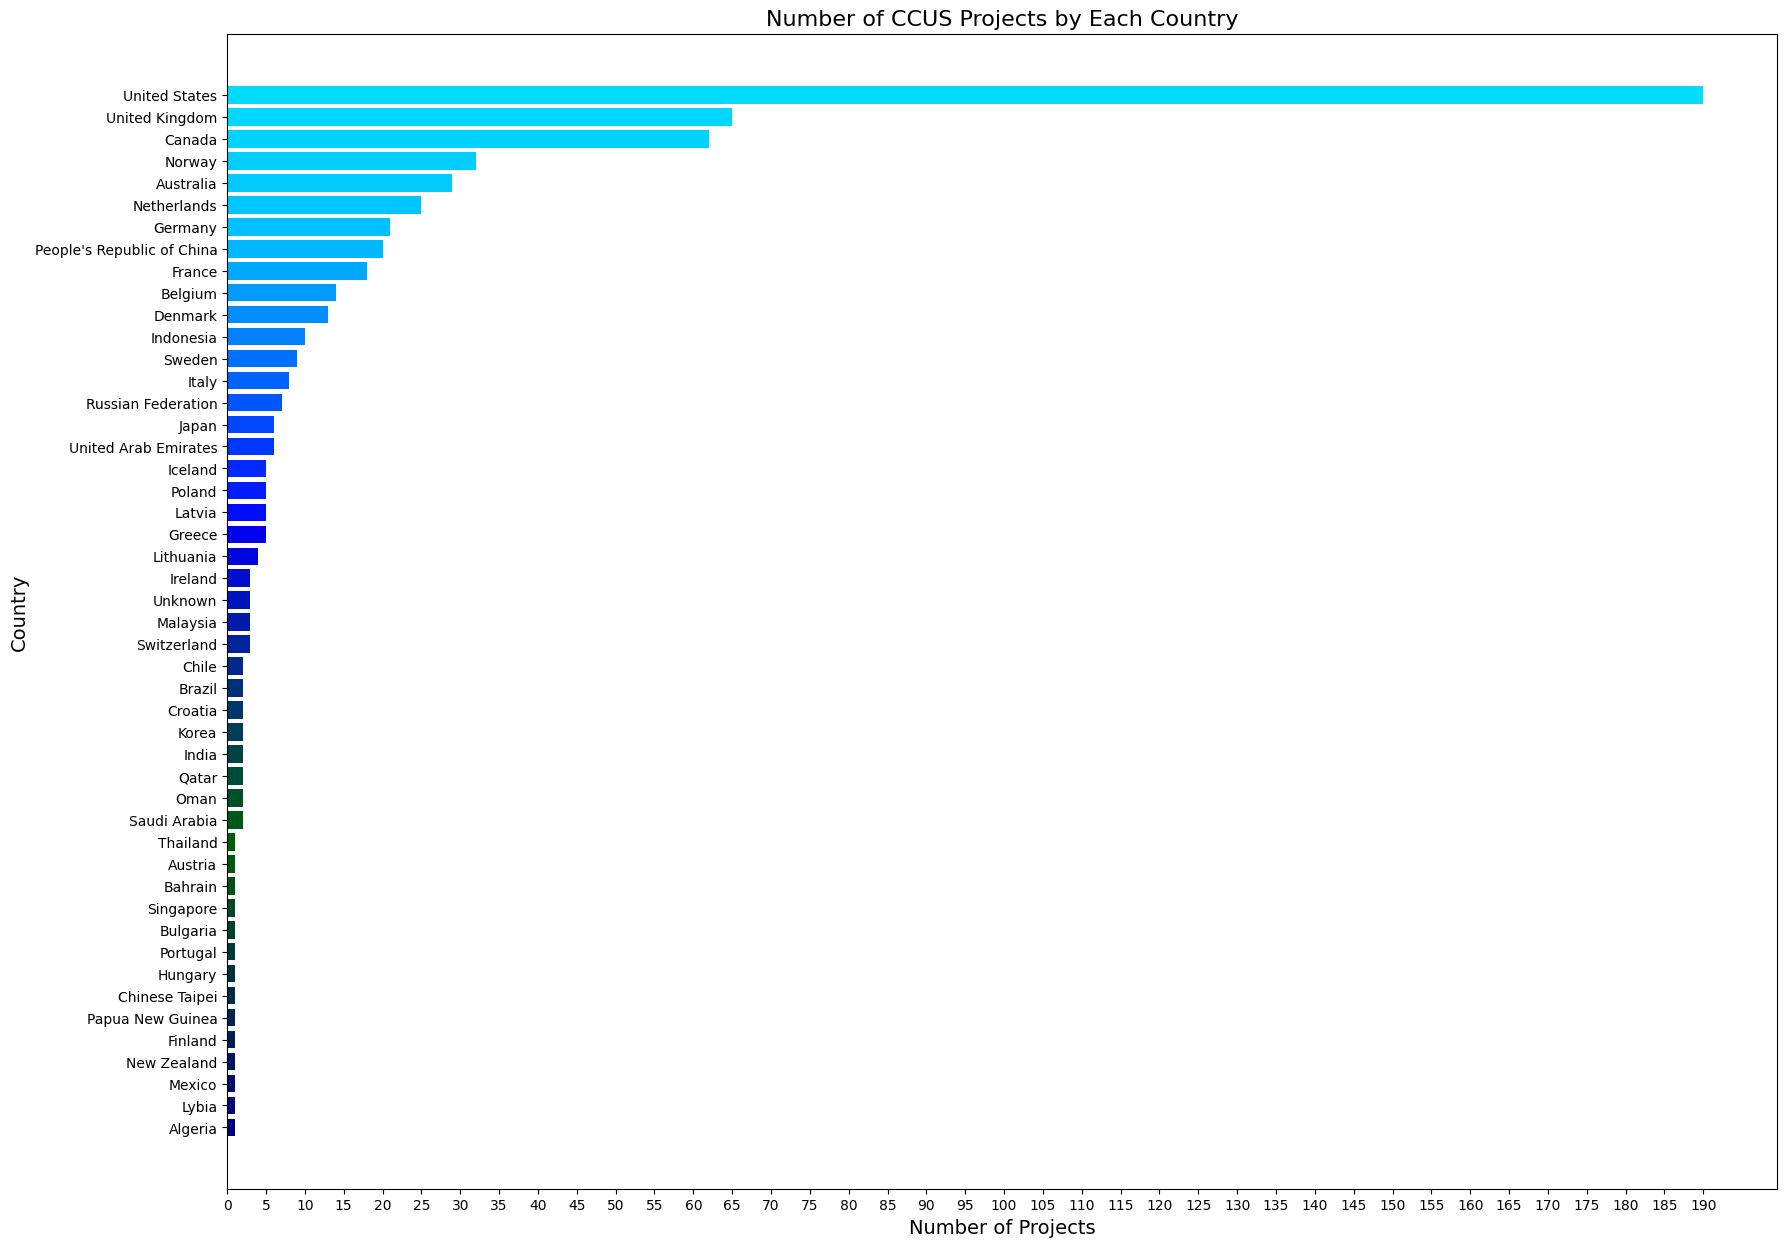

In [ ]:
plt.figure(figsize=(20,15))
carbon_splited3 =carbon_splited2.sort_values(by='count',ascending=True)
plt.barh(carbon_splited3['country'], carbon_splited3['count'],color=plt.cm.gist_ncar(np.arange(len(carbon_splited3))))
plt.ylabel("Country",fontsize=14)
plt.xlabel("Number of Projects",fontsize=14)
plt.xticks(np.arange(carbon_splited3['count'].min()-1,carbon_splited3['count'].max()+5,5))
plt.title("Number of CCUS Projects by Each Country",fontsize=16);

Cummulatively, the United States is a leader in CCUS deployment with 190 projects which more than twice that of the seconder, the United Kingdom.

## Probable Fate of Captured CO2

In [ ]:
carbon.fate_of_carbon.value_counts()

fate_of_carbon
Dedicated storage      352
Unknown/unspecified     73
EOR                     61
Use                     34
Use and storage          2
EOR and use              1
Mixed                    1
Storage                  1
Use and EOR              1
Name: count, dtype: int64

In [ ]:
carbon.replace({"fate_of_carbon":{"Storage":"Dedicated storage","Use and EOR":"EOR and use","Mixed":"Use and storage"}}, inplace=True)

In [ ]:
project_number=carbon.fate_of_carbon.value_counts()
project_number=pd.DataFrame(project_number).reset_index()
project_number

fate_of_carbon  count
0    Dedicated storage    353
1  Unknown/unspecified     73
2                  EOR     61
3                  Use     34
4      Use and storage      3
5          EOR and use      2

In [ ]:
probability=carbon.fate_of_carbon.value_counts()/carbon.fate_of_carbon.value_counts().sum()
probability=pd.DataFrame(probability).reset_index()
probability.rename(columns={"count":"percentage"},inplace=True)
probability

fate_of_carbon  percentage
0    Dedicated storage    0.671103
1  Unknown/unspecified    0.138783
2                  EOR    0.115970
3                  Use    0.064639
4      Use and storage    0.005703
5          EOR and use    0.003802

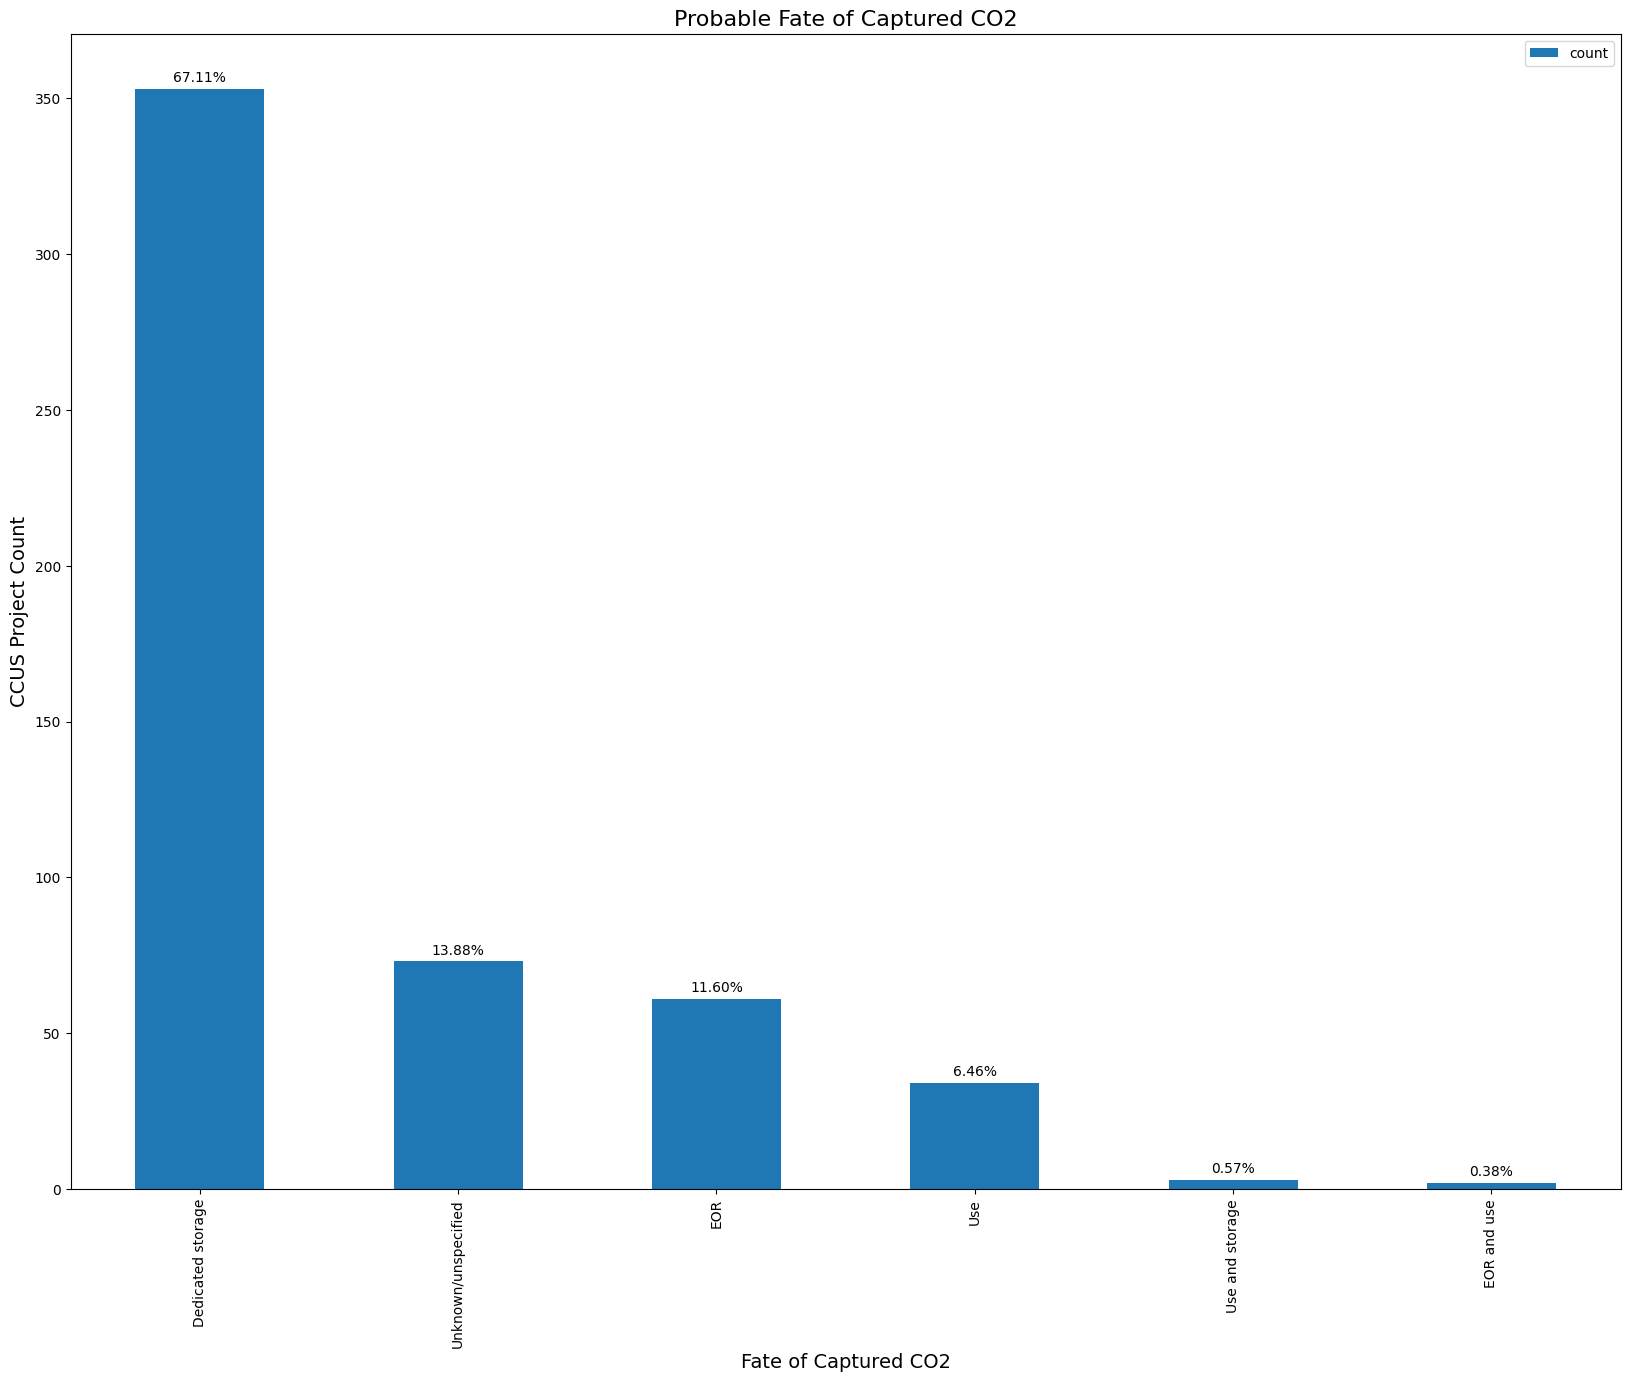

In [ ]:
ax = project_number.plot.bar(x='fate_of_carbon', y='count', figsize=(20, 15))

# Annotate each bar with its corresponding percentage from Table 2
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage = probability.loc[i, 'percentage']
    ax.annotate(f'{percentage:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better visibility
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the chart labels and title
ax.set_xlabel('Fate of Captured CO2',fontsize=14)
ax.set_ylabel('CCUS Project Count',fontsize=14)
ax.set_title('Probable Fate of Captured CO2',fontsize=16)

# Show the chart
plt.show()

Capured CO2 is most likely to be geologically sequestered with a 0.67 probability. The CO2 economy which is relevant for the scalability of the utilisation component of CCUS is still budding with the most likely known use of captured CO2 been for EOR.

## Number of Announced CCUS Projects Per Year (All Phases Inclusive)



In [ ]:
carbondioxide.project_phase.value_counts()

project_phase
1.0    66
2.0    52
3.0    10
4.0     1
Name: count, dtype: int64

In [ ]:
carbondioxide.announcement.value_counts()

announcement
2021    190
2022    165
2020     47
2023     37
2019     35
2018     22
2011     10
2016      8
2009      7
2017      7
2013      5
2010      5
2008      4
2012      3
2015      2
2006      1
2007      1
1997      1
2014      1
1991      1
2002      1
Name: count, dtype: Int64

In [ ]:
announced=carbondioxide.announcement.value_counts().reset_index().sort_values(by='count',ascending=True)

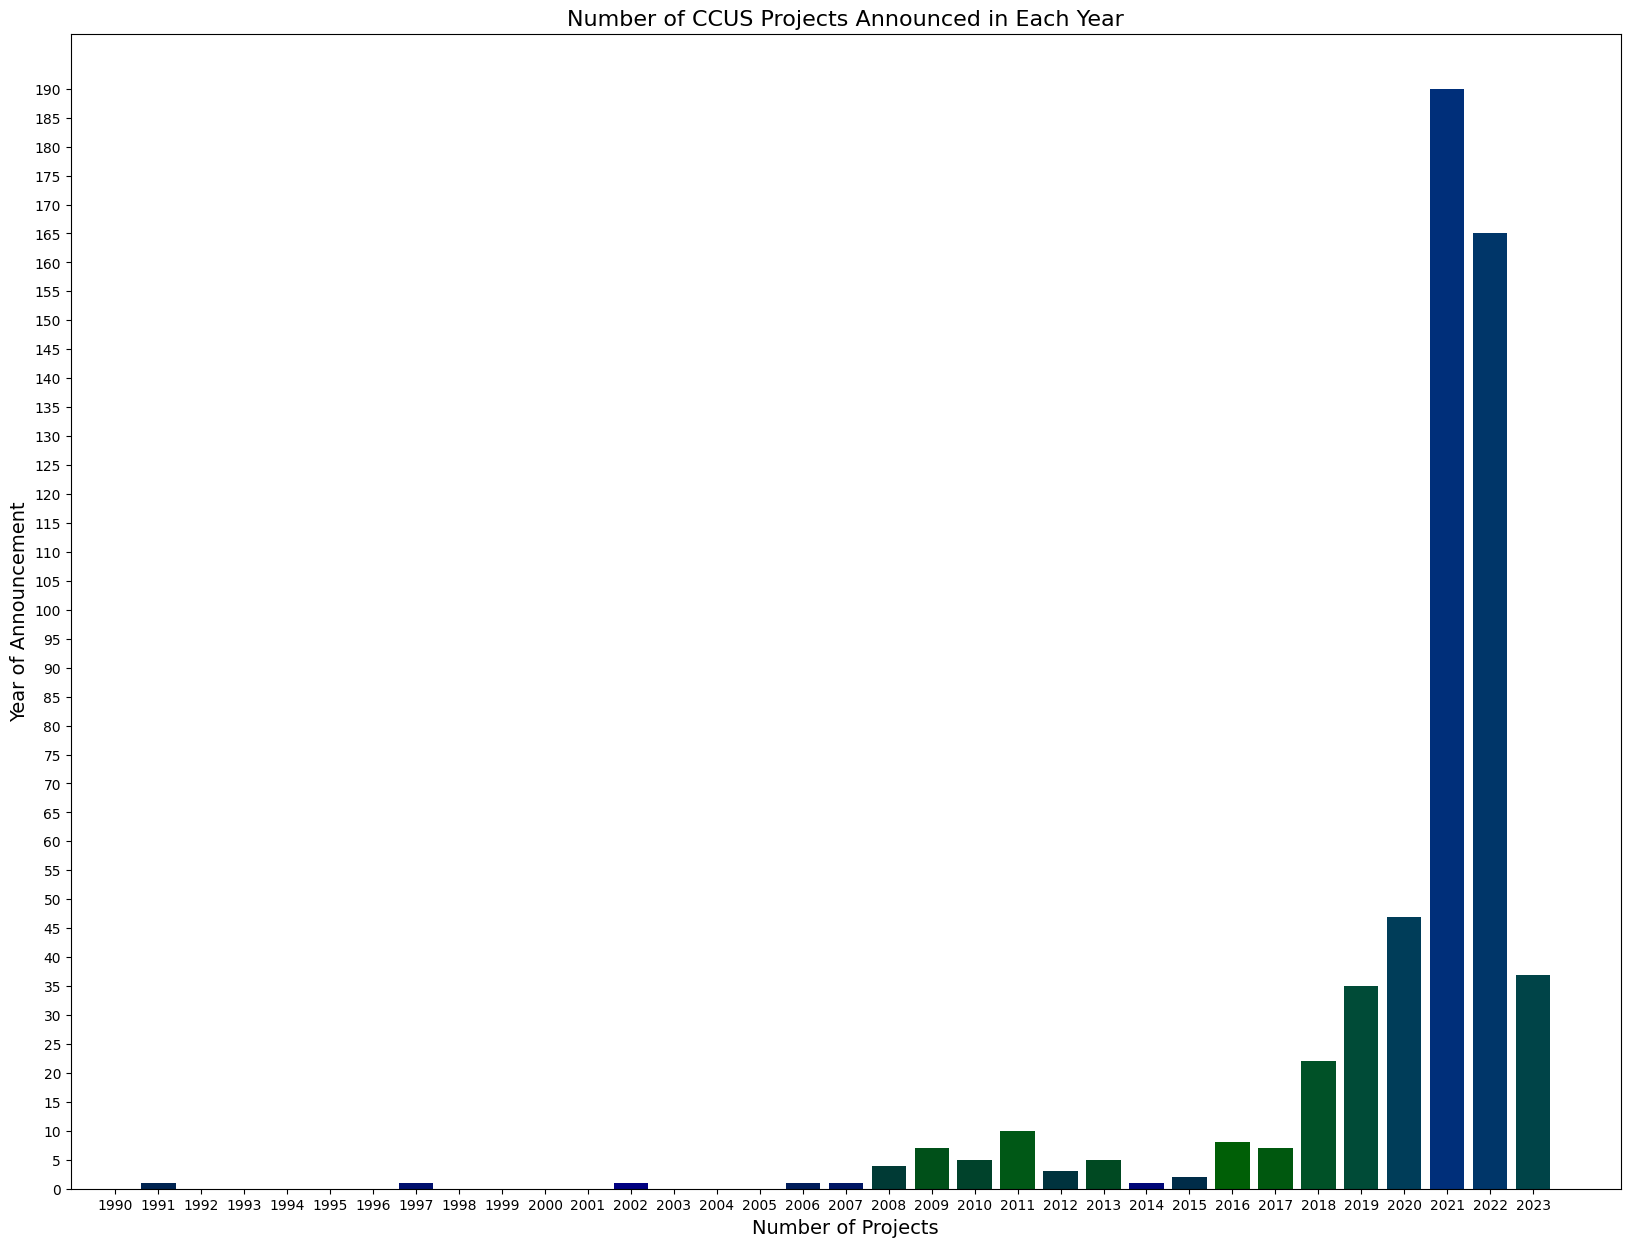

In [ ]:
plt.figure(figsize=(20,15))
announced2=announced.copy()
announced2.announcement=announced2.announcement.astype("int")
plt.bar(announced2['announcement'], announced2['count'],color=plt.cm.gist_ncar(np.arange(len(announced2))))
plt.ylabel("Year of Announcement",fontsize=14)
plt.xlabel("Number of Projects",fontsize=14)
plt.xticks(np.arange(announced2['announcement'].min()-1,announced2['announcement'].max()+1,1))
plt.yticks(np.arange(announced2['count'].min()-1,announced2['count'].max()+5,5))
plt.title("Number of CCUS Projects Announced in Each Year",fontsize=16);

## CCUS Projects Announced Annually (Phase 1 only)

In [ ]:
carbondioxide2=carbondioxide.loc[(carbondioxide['project_phase'].notna() == False) | (carbondioxide['project_phase'] == 1.0)]
carbondioxide2

project_name  \
0    3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...   
1                               8Rivers H2 (8RH2) (WY)   
2     Abu Dhabi CCS Phase 1: Emirates Steel Industries   
5               Acorn CCS phase 1-Capture at St Fergus   
6                                Acorn CCS phase 1-T&S   
8                                             Acorn H2   
9                   Adbri Calix new Lime plant Kwinana   
10           ADM & Wolf Carbon Solutions pipeline (IA)   
11                    ADM Cedar rapids bioethanol (IA)   
12                         ADM Clinton bioethanol (IA)   
13   Advanced CO2 Capture from Hydrogen Production ...   
14                     Aemetis CCS Keyes facility (CA)   
15                 Aemetis CCS Riverbank facility (CA)   
16               Air Liquide Botlek Rotterdam refinery   
17   Air Liquide Total Energies Grandpuits biorefinery   
18   AirCapture DACU at Nutrien Kennewick Fertilize...   
19    AirCapture Nuclear DAC at JM Farley Nuclear (AL)   
20   Alberta Carbon Grid (ALB) phase 1 (Industrial ...   
21                   Alberta Carbon Grid (ALB) phase 2   
22              Alberta Carbon Trunk Line (ACTL) (ALB)   
23                     Altera Stella Maris CCS Project   
24                       Aluminium Bahrain MHI capture   
25      ANRAV-CCUS (Heidelberg Materials Devnya plant)   
26                    Antwerp@C CO2 Export Hub phase 1   
28                                  Aramis CCS phase 1   
30       Arcelor LanzaTech Carbalyst (Steelanol) Ghent   
32               Arkalon CO2 Compression Facility (KS)   
33                       Arthit offshore gas field CCS   
34                                 Arun CCS (Arun LNG)   
35           Ascension Clean Energy (ACE) complex (LA)   
36                    Athabasca Banks Carbon Hub (ALB)   
37                     Athabasca Leismer project (ALB)   
38   Atlas Carbon Sequestration Hub Phase 1 (former...   
40                                         Augusta C2    
41                                  Aukra Hydrogen Hub   
42            Avedøre and Asnæs Power Station (Ørsted)   
43                   Bacton Thames Net Zero initiative   
44                                 Balikpapan Refinery   
45                Barents Blue ammonia project Train 1   
48   Barossa and Darwin liquefied natural gas (DLNG...   
49                       Battle River Carbon Hub (ALB)   
50                        Bayou Bend CCS offshore (TX)   
51    Bayu-Undan field storage hub Timor-Leste phase 1   
53          BIGST gas fiels Cluster Heads of Agreement   
54                              Biorecro Igelsta plant   
55                          BIR Waste-to-Energy Bergen   
56           Blue Biston ATR advanced CCUS system (WY)   
57   Blue but better (ALB) (Air Products Hydrogen P...   
58                         Bonanza BioEnergy CCUS (KS)   
59                      Bonaparte CCS Assessment G7-AP   
60   Boral Southern Highlands cement and lime facil...   
61                                Borealis Antwerp CCS   
62                         Borregaard / SAE (Borg CO2)   
63                 Boryeong LNG Terminal blue hydrogen   
64                             Boundary Dam CCS (SASK)   
65                                 Bow River Hub (ALB)   
66                               BP H2Teesside Phase 1   
68              Brazeau Carbon Sequestration Hub (ALB)   
69               Bridgeport Energy Moonie CCUS Project   
70                 Broadwing Clean Energy Complex (IL)   
71                      Bushmills Ethanol Atwater (MN)   
72                                Buxton Lime Net Zero   
73                   Buzzi Unicem Augusta cement plant   
74                                      C Zero phase 1   
77         CalCapture CCS+ Elk Hills power plant (CA)    
78            CalCC Lhoist Air Liquide Lime plant Rety   
79   Caledonia Clean Energy (previously Captain Cle...   
80                                    Callisto phase 1   
82                  Calpine Baytown Ener

In [ ]:
announced3=carbondioxide2.announcement.value_counts().reset_index().sort_values(by='count',ascending=True)

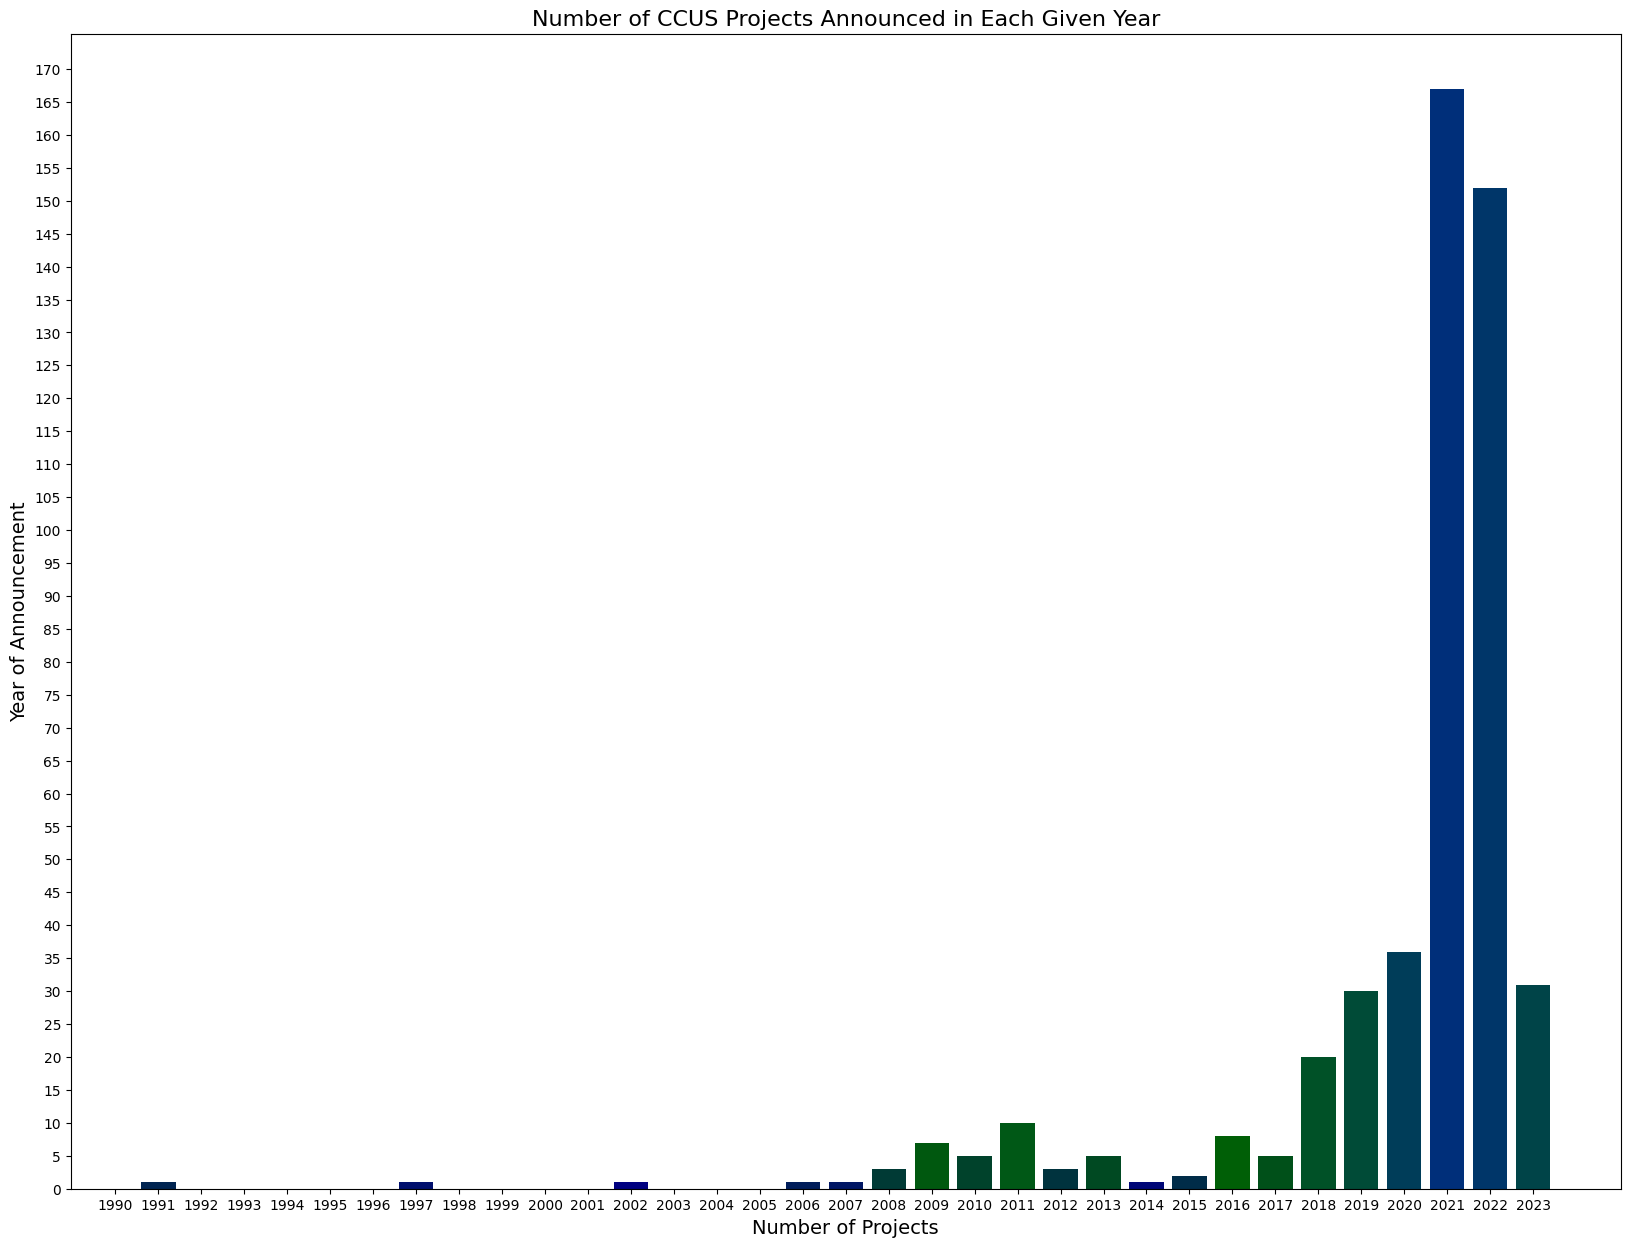

In [ ]:
plt.figure(figsize=(20,15))
announced4=announced3.copy()
announced4.announcement=announced4.announcement.astype("int")
plt.bar(announced4['announcement'], announced4['count'],color=plt.cm.gist_ncar(np.arange(len(announced4))))
plt.ylabel("Year of Announcement",fontsize=14)
plt.xlabel("Number of Projects",fontsize=14)
plt.xticks(np.arange(announced4['announcement'].min()-1,announced4['announcement'].max()+1,1))
plt.yticks(np.arange(announced4['count'].min()-1,announced4['count'].max()+5,5))
plt.title("Number of CCUS Projects Announced in Each Given Year",fontsize=16);

2022 remains the year with the peak number of CCUS deployment and annoucement irrespective of whether all phases are considered or not. Since 2017, there has been a steady increase in the number of projects. However, 2023 might the year that discontinues that trend.

## Status of CCUS Projects

In [ ]:
status=carbondioxide.project_status.value_counts().reset_index()
status

project_status  count
0             Planned    499
1         Operational     47
2  Under construction     23
3      Decommissioned      3
4           Suspended      1

In [ ]:
status2=carbondioxide2.project_status.value_counts().reset_index()
status2

project_status  count
0             Planned    437
1         Operational     46
2  Under construction     23
3      Decommissioned      3
4           Suspended      1

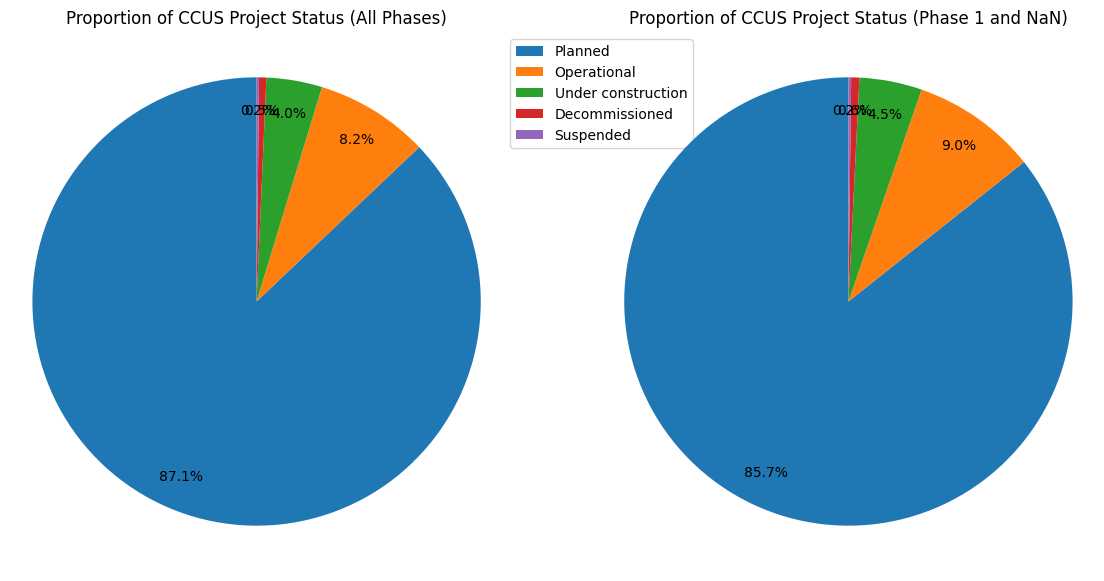

In [ ]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pie chart for first table
wedges1, texts1, autotexts1 = axes[0].pie(status['count'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.05)
axes[0].set_title('Proportion of CCUS Project Status (All Phases)')

# Plot pie chart for second table
wedges2, texts2, autotexts2 = axes[1].pie(status2['count'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.05)
axes[1].set_title('Proportion of CCUS Project Status (Phase 1 and NaN)')

# Equalize aspect ratios to ensure they remain circles
axes[0].axis('equal')
axes[1].axis('equal')

# Add labels outside the pie charts with more space
axes[0].legend(wedges1, status['project_status'], loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()



In both cases, we can conclude that most CCUS projects are still at the planning stage. However, only a fraction of operational projects have been suspended or decommissioned.

## Disaggregation of CCUS Projects by Sector and Project Type

In [ ]:
sector_projects=carbondioxide.groupby(['sector', 'project_type']).count().project_name.reset_index()
sector_projects

<ipython-input-83-dcd37dc244b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_projects=carbondioxide.groupby(['sector', 'project_type']).count().project_name.reset_index()


sector project_type  project_name
0                    Biofuels          CCU             1
1                    Biofuels      Capture            41
2                    Biofuels   Full chain            18
3                    Biofuels      Storage             0
4                    Biofuels          T&S             0
5                    Biofuels    Transport             0
6                     CO2 T&S          CCU             0
7                     CO2 T&S      Capture             0
8                     CO2 T&S   Full chain             1
9                     CO2 T&S      Storage             4
10                    CO2 T&S          T&S            61
11                    CO2 T&S    Transport             0
12                CO2 storage          CCU             0
13                CO2 storage      Capture             0
14                CO2 storage   Full chain             0
15                CO2 storage      Storage            48
16                CO2 storage          T&S             3
17                CO2 storage    Transport             0
18              CO2 transport          CCU             0
19              CO2 transport      Capture             0
20              CO2 transport   Full chain             0
21              CO2 transport      Storage             0
22              CO2 transport          T&S             0
23              CO2 transport    Transport            46
24                     Cement          CCU             4
25                     Cement      Capture            20
26                     Cement   Full chain             3
27                     Cement      Storage             0
28                     Cement          T&S             0
29                     Cement    Transport             0
30         Direct Air Capture          CCU            11
31         Direct Air Capture      Capture             9
32         Direct Air Capture   Full chain            12
33         Direct Air Capture      Storage             0
34         Direct Air Capture          T&S             0
35         Direct Air Capture    Transport             0
36           Hydrogen/ammonia          CCU             1
37           Hydrogen/ammonia      Capture            46
38           Hydrogen/ammonia   Full chain            26
39           Hydrogen/ammonia      Storage             0
40           Hydrogen/ammonia          T&S             0
41           Hydrogen/ammonia    Transport             0
42             Iron and steel          CCU             2
43             Iron and steel      Capture             3
44             Iron and steel   Full chain             2
45             Iron and steel      Storage             0
46             Iron and steel          T&S             0
47             Iron and steel    Transport             0
48     Natural gas processing          CCU             0
49     Natural gas processing      Capture             7
50     Natural gas processing   Full chain            43
51     Natural gas processing      Storage             0
52     Natural gas processing          T&S             0
53     Natural gas processing    Transport             0
54  Other fuel transformation          CCU             3
55  Other fuel transformation      Capture            28
56  Other fuel transformation   Full chain            10
57  Other fuel transformation      Storage             0
58  Other fuel transformation          T&S             0
59  Other fuel transformation    Transport             0
60             Other industry          CCU             4
61             Other industry      Capture            26
62             Other industry   Full chain             7
63             Other industry      Storage             0
64             Other industry          T&S             0
65             Other industry    Transport             0
66             Power and heat          CCU             6
67             Power and heat      Capture            54
68             Power and heat   Full chain            23
69             Power and heat    

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


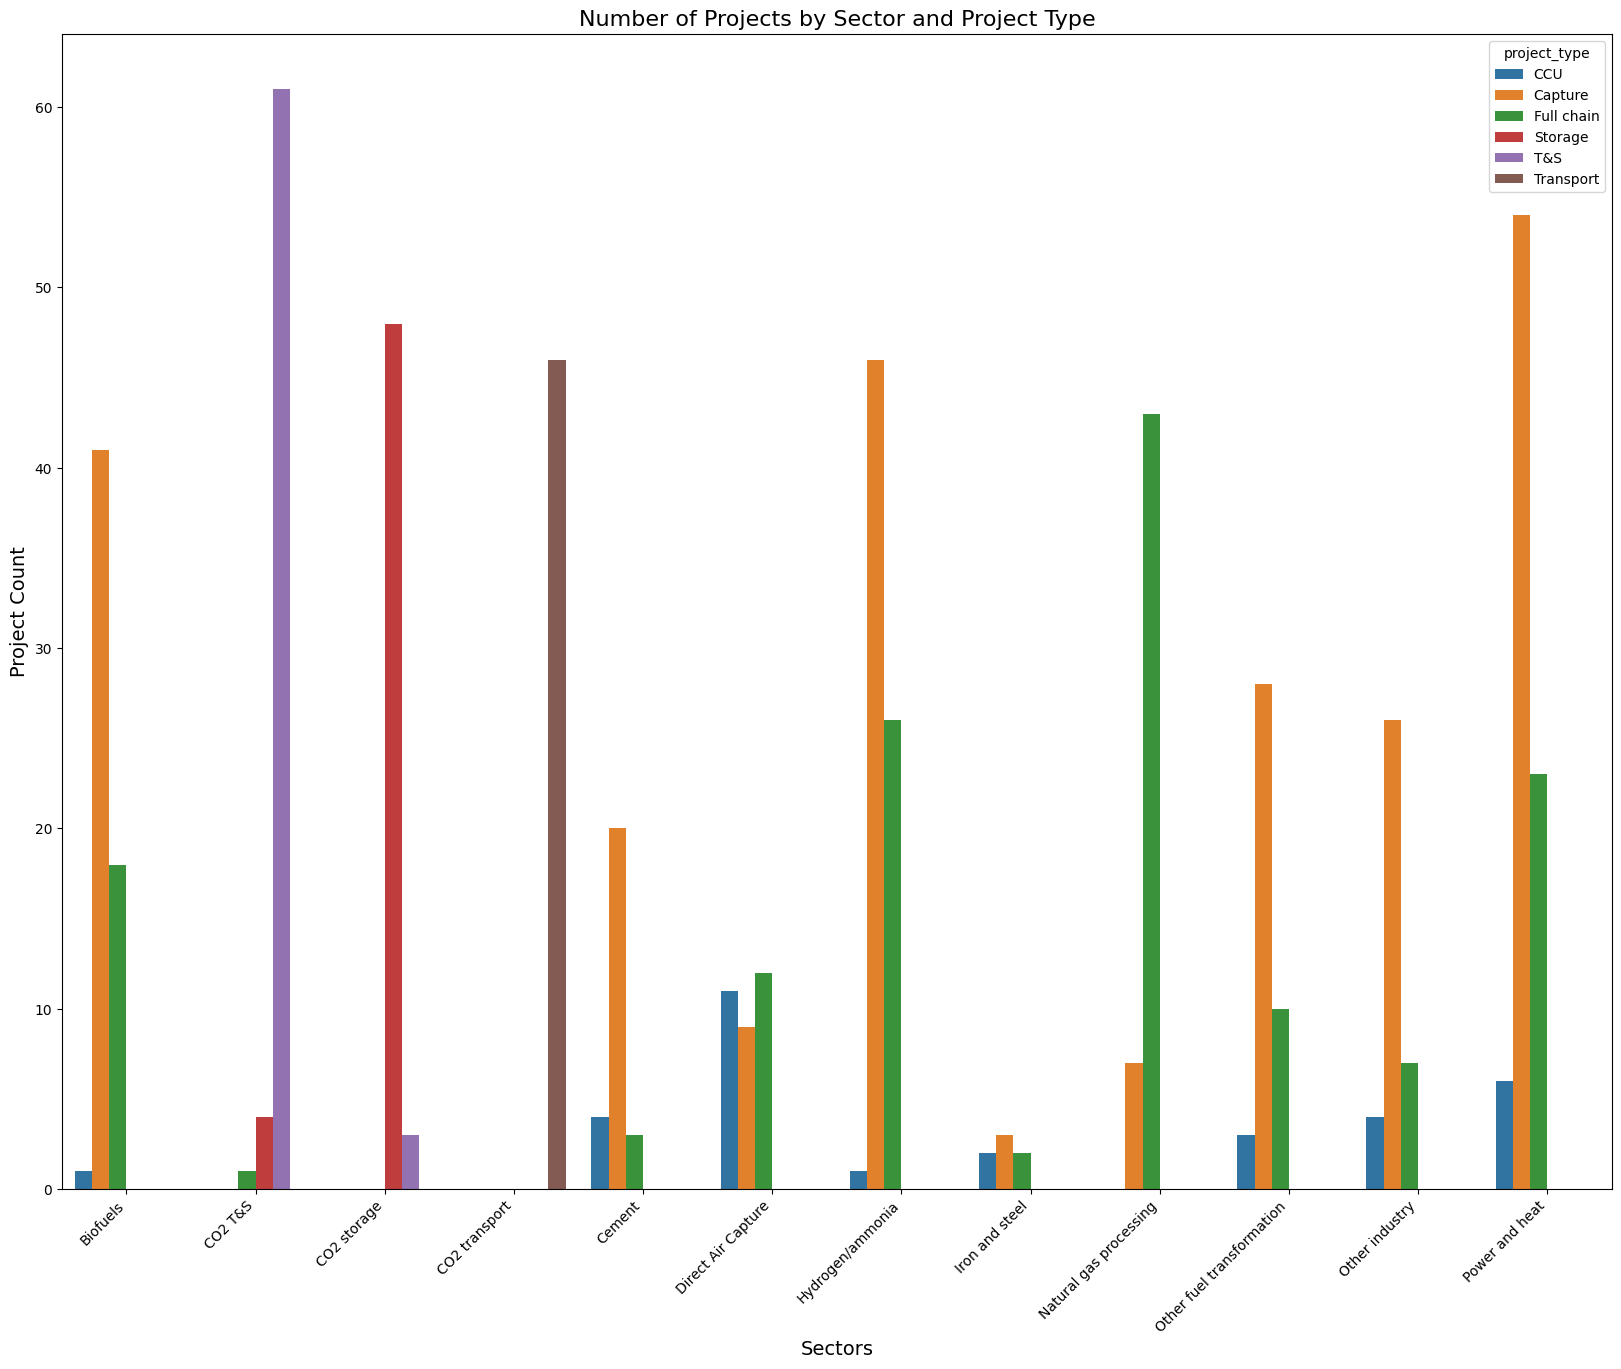

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x="sector", hue="project_type", data=carbondioxide)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.xlabel("Sectors",fontsize=14)
plt.ylabel("Project Count",fontsize=14)
plt.title("Number of Projects by Sector and Project Type", fontsize=16);

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


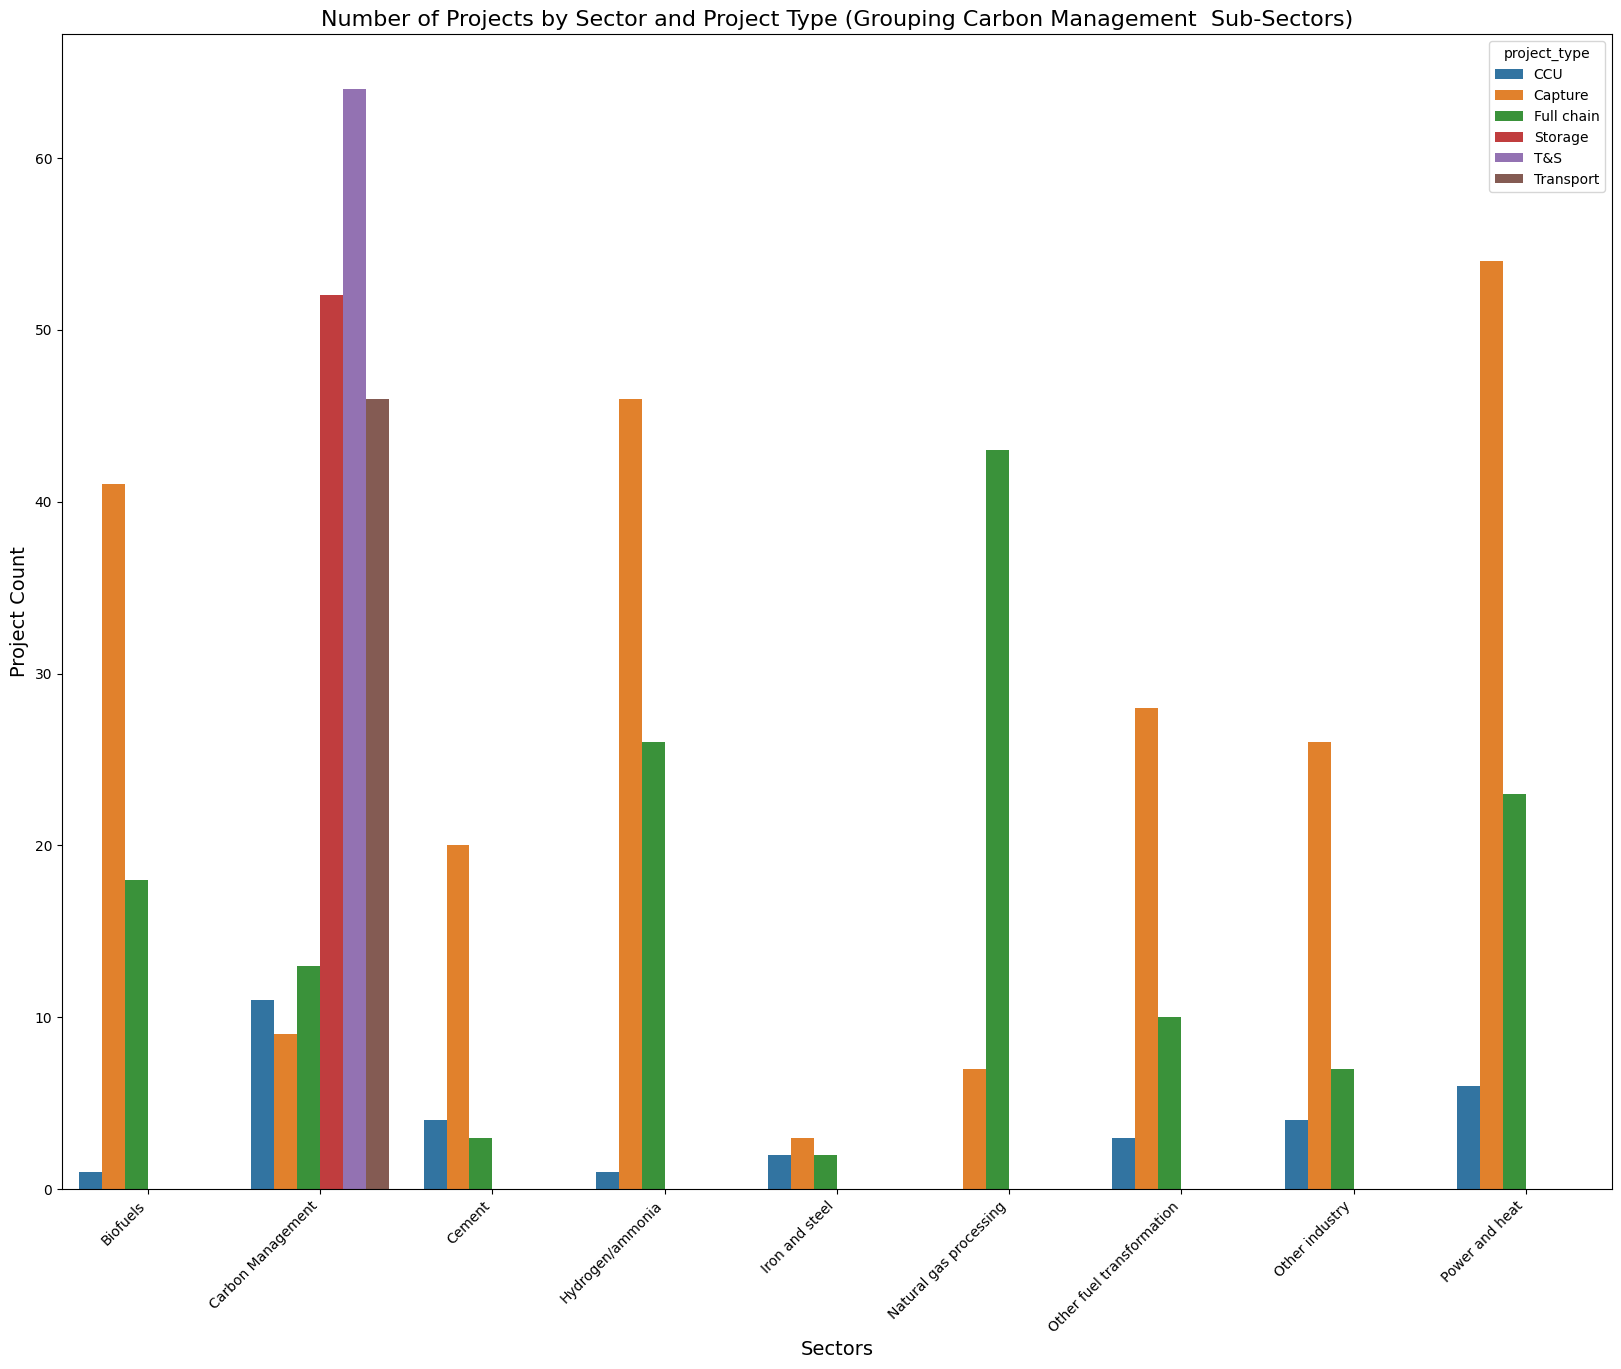

In [ ]:
carbondioxide3=carbondioxide.copy()
carbondioxide3.sector.replace(['CO2 T&S','CO2 storage','CO2 transport','Direct Air Capture'],'Carbon Management',inplace=True)
plt.figure(figsize=(20,15))
sns.countplot(x="sector", hue="project_type", data=carbondioxide3)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.xlabel("Sectors",fontsize=14)
plt.ylabel("Project Count",fontsize=14)
plt.title("Number of Projects by Sector and Project Type (Grouping Carbon Management  Sub-Sectors)", fontsize=16);

Grouping the carbon management sub-sectors, most sectors (excluding carbon management and natural gas processing) have most of there projects focused on CO2 capture. Natural gas processing companies usually consider the full chain of CCUS when planning and deploying projects. Hard-to-abate sectors such as iron, steel and cement have the lowest number of projects compared to other sectors. Sole dedication to storage is seen only in the carbon management sector.


In [ ]:
sector_projects2=carbondioxide3.groupby(['sector', 'project_type']).count().project_name.reset_index()
sector_projects2

<ipython-input-86-48ba154db51f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_projects2=carbondioxide3.groupby(['sector', 'project_type']).count().project_name.reset_index()


sector project_type  project_name
0                    Biofuels          CCU             1
1                    Biofuels      Capture            41
2                    Biofuels   Full chain            18
3                    Biofuels      Storage             0
4                    Biofuels          T&S             0
5                    Biofuels    Transport             0
6           Carbon Management          CCU            11
7           Carbon Management      Capture             9
8           Carbon Management   Full chain            13
9           Carbon Management      Storage            52
10          Carbon Management          T&S            64
11          Carbon Management    Transport            46
12                     Cement          CCU             4
13                     Cement      Capture            20
14                     Cement   Full chain             3
15                     Cement      Storage             0
16                     Cement          T&S             0
17                     Cement    Transport             0
18           Hydrogen/ammonia          CCU             1
19           Hydrogen/ammonia      Capture            46
20           Hydrogen/ammonia   Full chain            26
21           Hydrogen/ammonia      Storage             0
22           Hydrogen/ammonia          T&S             0
23           Hydrogen/ammonia    Transport             0
24             Iron and steel          CCU             2
25             Iron and steel      Capture             3
26             Iron and steel   Full chain             2
27             Iron and steel      Storage             0
28             Iron and steel          T&S             0
29             Iron and steel    Transport             0
30     Natural gas processing          CCU             0
31     Natural gas processing      Capture             7
32     Natural gas processing   Full chain            43
33     Natural gas processing      Storage             0
34     Natural gas processing          T&S             0
35     Natural gas processing    Transport             0
36  Other fuel transformation          CCU             3
37  Other fuel transformation      Capture            28
38  Other fuel transformation   Full chain            10
39  Other fuel transformation      Storage             0
40  Other fuel transformation          T&S             0
41  Other fuel transformation    Transport             0
42             Other industry          CCU             4
43             Other industry      Capture            26
44             Other industry   Full chain             7
45             Other industry      Storage             0
46             Other industry          T&S             0
47             Other industry    Transport             0
48             Power and heat          CCU             6
49             Power and heat      Capture            54
50             Power and heat   Full chain            23
51             Power and heat      Storage             0
52             Power and heat          T&S             0
53             Power and heat    Transport             0

## Progression of Average CCUS Capacity Over the Years

In [ ]:
carbonite=carbondioxide.copy()
carbonite['announced_mean']=(carbonite['announced_capacity_(low)_(mt_co2/yr)']+carbonite['announced_capacity_(high)_(mt_co2/yr)'])/2
bake=carbonite.groupby('announcement').announced_mean.sum().reset_index()
bake

announcement  announced_mean
0           1991        1.000000
1           1997        3.000000
2           2002        0.700000
3           2006        0.515000
4           2007        0.800000
5           2008        8.920000
6           2009       12.280000
7           2010        6.938450
8           2011       27.505000
9           2012        4.350000
10          2013       15.000000
11          2014        1.500000
12          2015        0.500000
13          2016        6.660000
14          2017       16.700000
15          2018       28.228793
16          2019       84.705000
17          2020       95.181450
18          2021      246.332500
19          2022      454.788000
20          2023       78.366667

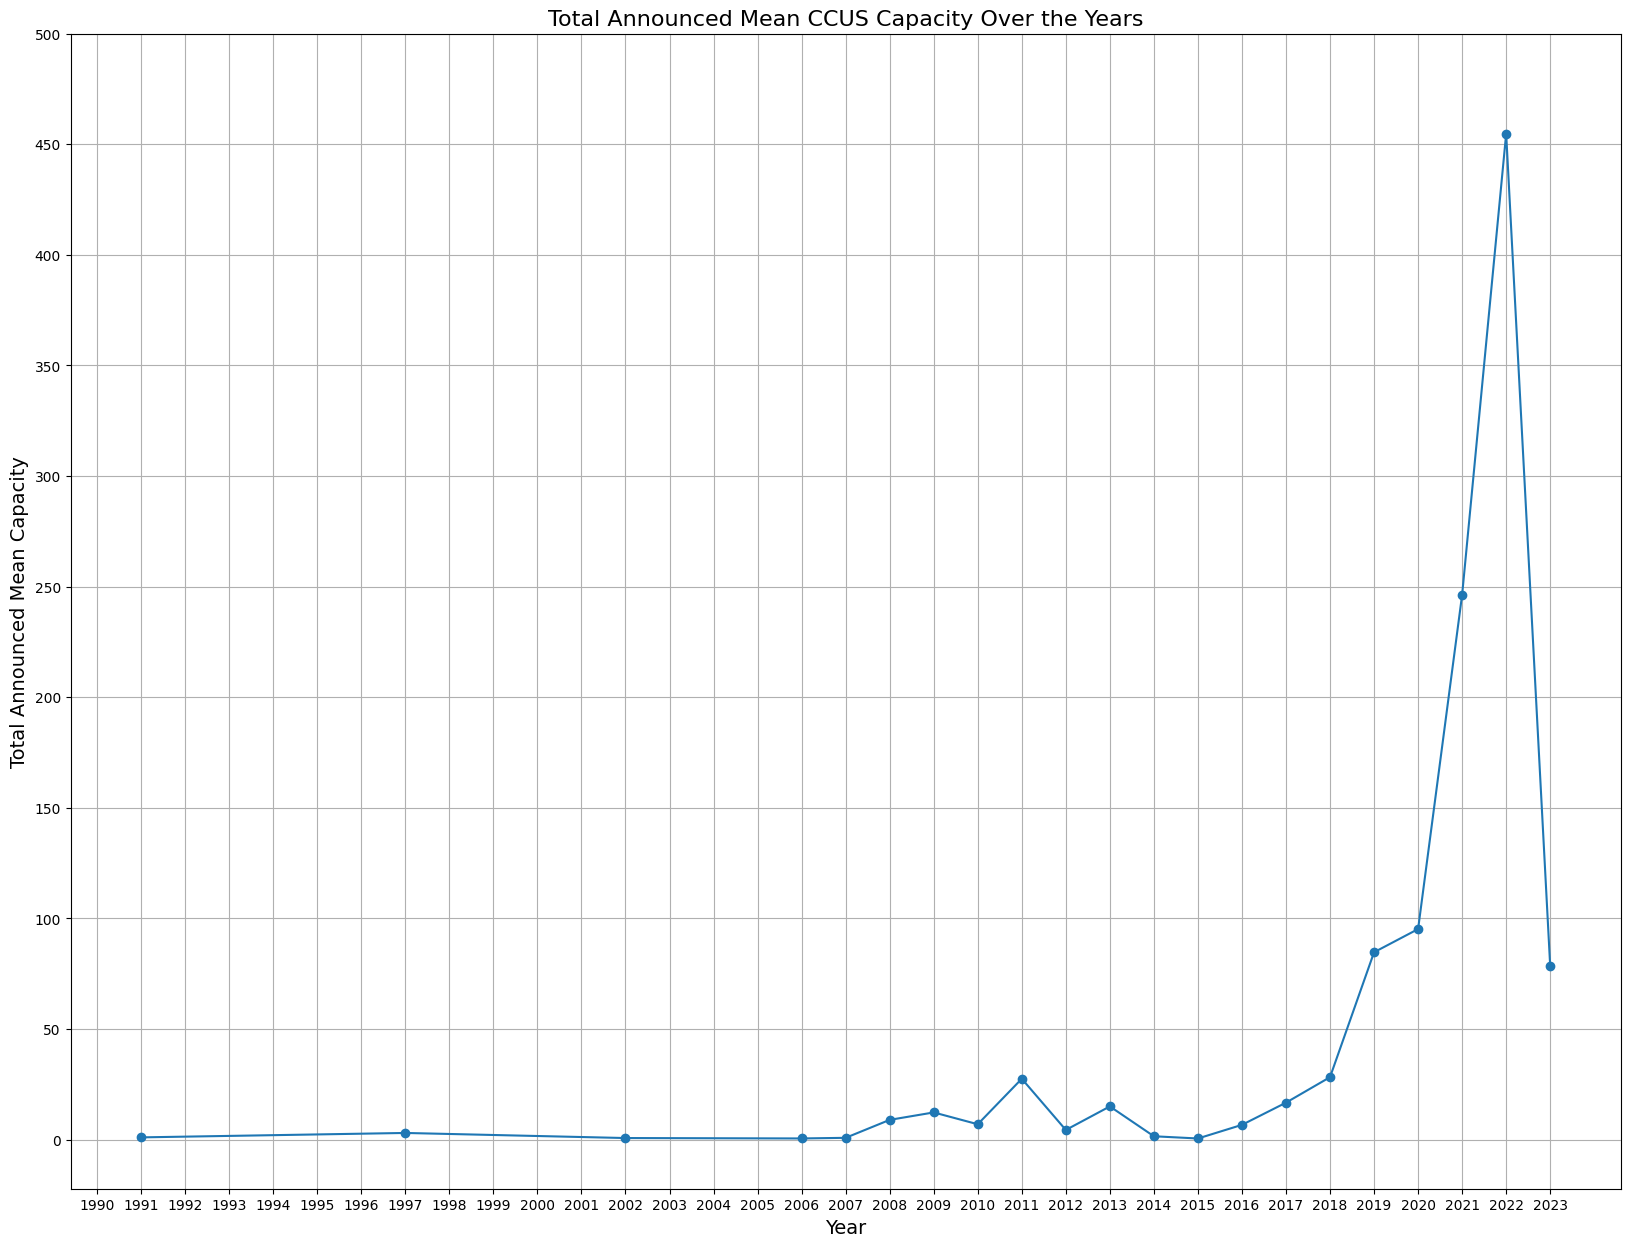

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(bake["announcement"], bake["announced_mean"], marker='o')
plt.xlabel("Year", fontsize=14)
plt.yticks(np.arange(bake['announced_mean'].min()-0.5,bake['announced_mean'].max()+50,50))
plt.xticks(np.arange(bake['announcement'].min()-1,bake['announcement'].max()+1,1))
plt.ylabel("Total Announced Mean Capacity", fontsize=14)
plt.title("Total Announced Mean CCUS Capacity Over the Years", fontsize=16)

plt.grid(True)
plt.show()

2022 witnessed the peak in announced average capcity. The steady rising trend which have been noticed since 2016/2017 might be disrupted in 2023.

## CCUS Partner Companies Partnerships

In [ ]:
carbondioxide.partners.value_counts()

partners
Denbury Carbon Solutions                                                                                                                                                                                                                                                                       6
Occidental, 1PointFive, Carbon Engineering                                                                                                                                                                                                                                                     5
Capio Danmark                                                                                                                                                                                                                                                                                  5
Eni                                                                                                                         

In [ ]:
carbondioxide.partners=carbondioxide.partners.astype("str")

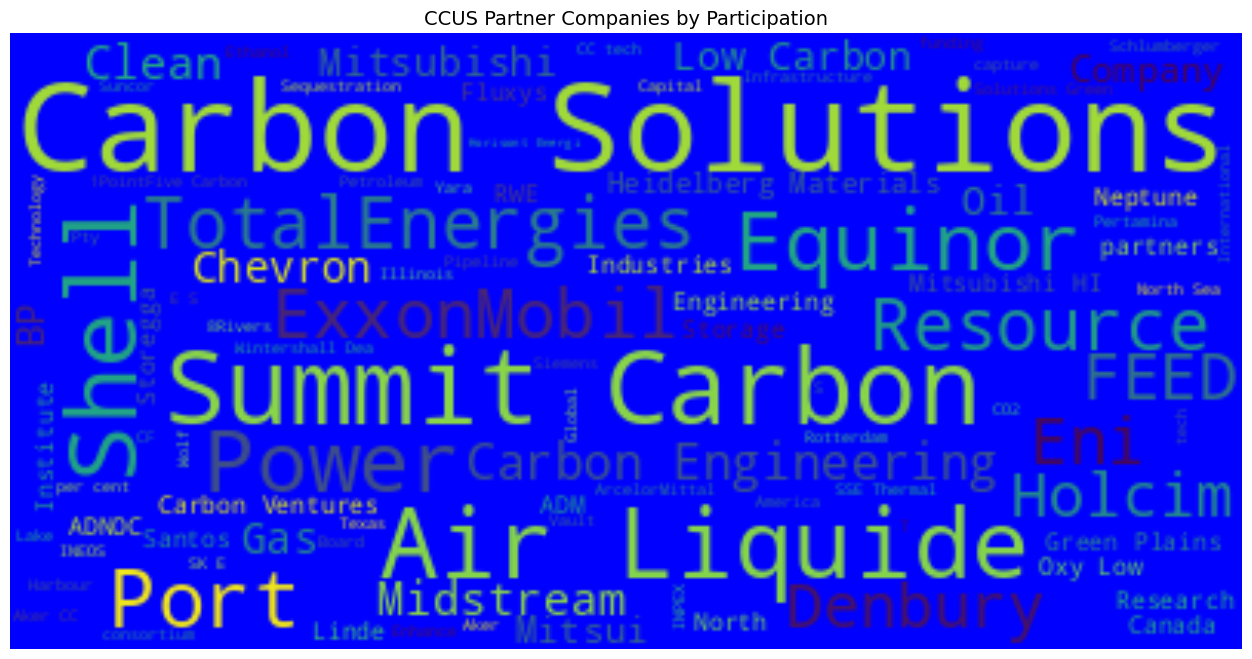

In [ ]:
plt.rcParams["figure.figsize"] = [20, 8]
#Specify wordclouds' main title
text1=" ".join(entity for entity in carbondioxide.partners)
#update exceptions
stopwords = set(STOPWORDS)
stopwords.update(['University','Inc','Venture','Partner','LLC','Ltd','Energy','per cent','Corp','Operator','Corporation','Group','Partnership'])

wordcloud = WordCloud(max_font_size=50, max_words=1000, stopwords=stopwords, background_color="blue").generate(text1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("CCUS Partner Companies by Participation", fontsize=14)

plt.show()



Based on the given dataset Carbon Solutions has the most participation in CCUS compared to other companies.

## Conclusion

The following conclusions could be drawn:
- The United States is a global leader in CCUS projects while Carbon Solutions is the company with the most participation.
- 2022 saw a peak in both the number of CCUS projects and the average announced capacity while 2023 might discontinue the 5-year growth trend.
- From a sectorial standpoint, most announced projects are concentrated in the capture value chain with the exception of carbon management and natural gas processing sectors. Natural gas processing has more projects in the full value chain.
- Once captured, CO2 is more probable to be sequestered underground than utilized.
- Overall, most of the announced CCUS projects (more than 85%) are still in the planning phases while only 8-9% are currently operational.